    Descripción
Fundamentos de Data Science
Analizando los Salarios en Ciencia de Datos en 2023

    Requisitos:

Tu tarea es limpiar y explorar un dataset que contiene información sobre los salarios en el campo de la ciencia de datos para el año 2023. Este análisis es crucial para entender las tendencias salariales y los factores que influyen en las diferencias de salarios en esta industria.

El dataset puede ser encontrado aquí.

    Limpieza de datos con Python:
* Detección y eliminación de valores duplicados: Asegúrate de que cada registro en el dataset sea único.
* Verificación y ajuste de tipos de datos: Asegúrate de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.
* Consistencia en valores categóricos: Identifica y corrige cualquier inconsistencia en los valores categóricos (por ejemplo, ‘Junior’, ‘junior’, ‘JUNIOR’).
* Manejo de valores faltantes: Identifica y maneja cualquier valor faltante en el dataset. Rellena los valores faltantes con un marcador adecuado para el tipo de dato.
* Detección de datos anómalos: Identifica y corrige cualquier punto de dato inapropiado o inusual (por ejemplo, un salario anual de 1 millón de dólares para un puesto de entrada).

    Exploración de datos con Python:
* Visualizaciones exploratorias univariadas: Crea dos tipos diferentes de visualizaciones univariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.
* Visualizaciones exploratorias multivariadas: Crea dos tipos diferentes de visualizaciones multivariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

Análisis adicional:
1) Estadísticas descriptivas: Proporciona un resumen estadístico del dataset, incluyendo medidas de tendencia central y dispersión para las variables numéricas.
2) Identificación de tendencias: Analiza y discute cualquier tendencia notable que observes en los datos, apoyándote en las visualizaciones y estadísticas descriptivas.

Entrega:

* Un archivo .ipynb claramente comentado con todo el código utilizado para la limpieza y exploración de datos. Para cumplir con los requisitos anteriores, este archivo tendrá un mínimo de 4 visualizaciones.
* Subir un repositorio a una plataforma de control de versiones (por ejemplo, GitHub) con un TAG incluido para verificar la fecha de entrega. El repositorio debe contener el archivo .ipynb.

NOTA: Debes enviar un archivo y un enlace al repositorio con el TAG correspondiente. Las presentaciones de enlaces sin el archivo o sin el TAG serán consideradas no presentadas.


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# cargo el dataset

path = './data/ds_salaries.csv'
df = pd.read_csv(filepath_or_buffer=path, sep= ',', header=0)
print(df.shape)
df.head(10)

(3755, 11)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M


In [7]:
# Detección y eliminación de valores duplicados

duplicados = df.duplicated()
print(f"Se han detectado {duplicados.sum()} registros duplicados y fueron eliminads.")
sc_salarios_sin_duplicados = df.drop_duplicates()

Se han detectado 1171 registros duplicados y fueron eliminads.


In [12]:
# Verificación y ajuste de tipos de datos: Asegúrate de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.
print(df.dtypes)

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object
int64


In [ ]:
# Consistencia en valores categóricos: 
# Identifica y corrige cualquier inconsistencia en los valores categóricos (por ejemplo, ‘Junior’, ‘junior’, ‘JUNIOR’).
categoria_columna = df.select_dtypes(include='object').columns
for columna in categoria_columna:           # recorro las columnas de categoria object y verifico los valores unicos para revisar inconsitencias
    print(f"Valores unicos en la columna '{columna}':")
    print(df[columna].unique())


In [15]:
# Manejo de valores faltantes: Identifica y maneja cualquier valor faltante en el dataset. 
# Rellena los valores faltantes con un marcador adecuado para el tipo de dato.
# Verificar los valores faltantes por columna
valores_faltantes = df.isnull().sum()
print(valores_faltantes[valores_faltantes > 0])

Series([], dtype: int64)


In [109]:
# Detección de datos anómalos: Identifica y corrige cualquier punto de dato inapropiado o inusual 
# (por ejemplo, un salario anual de 1 millón de dólares para un puesto de entrada).
salarios_por_puesto = df.groupby('job_title')['salary_in_usd'].agg(['min', 'max', 'mean', 'std',
    lambda x: x.quantile(0.25), 
    lambda x: x.quantile(0.5),
    lambda x: x.quantile(0.75),
    ])
salarios_por_puesto ['std']= salarios_por_puesto['std'] * 1000
print(salarios_por_puesto.shape)
salarios_por_puesto.head(50)

(93, 7)


,min,max,mean,std,<lambda_0>,<lambda_1>,<lambda_2>
job_title,,,,,,,
3D Computer Vision Researcher,5409,50000,21352.250000,2.004647e+07,8852.25,15000.0,27500.00
AI Developer,6304,300000,136666.090909,9.597355e+07,69702.50,108000.0,207309.00
AI Programmer,40000,70000,55000.000000,2.121320e+07,47500.00,55000.0,62500.00
AI Scientist,12000,423834,110120.875000,1.117335e+08,31140.00,52500.0,200000.00
Analytics Engineer,7500,289800,152368.631068,5.383847e+07,116775.00,143860.0,185200.00
Applied Data Scientist,20670,380000,113726.300000,1.062940e+08,51059.50,74159.0,145259.25
Applied Machine Learning Engineer,69751,130000,99875.500000,4.260248e+07,84813.25,99875.5,114937.75
Applied Machine Learning Scientist,30469,423000,109452.833333,1.086015e+08,41792.25,76059.5,118500.00
Applied Scientist,72000,350000,190264.482759,5.200124e+07,142000.00,191737.5,220065.00


In [111]:
# se verifica que hay una desviacion estandar muy grande en los sueldos en algunas filas a causa de algunos
# sueldo superan ampliamente el millon de dolares por lo que se toma la desicion de dividirlos entre 10
# tambien asumi que los sueldos para un profesional anualmente que sean inferiores a 10k usd deberian multiplicarlos por 10 para nivelarlos
df['salary_in_usd'] = df['salary_in_usd'].apply(lambda x: x / 10 if x > 1_000_000 else x)
df['salary_in_usd'] = df['salary_in_usd'].apply(lambda x: x * 10 if x < 10_000 else x)
print(df['salary'].shape)
df.head(20)


(3755,)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000.0,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000.0,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500.0,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000.0,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000.0,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200.0,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000.0,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000.0,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000.0,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100.0,USD,147100,US,0,US,M


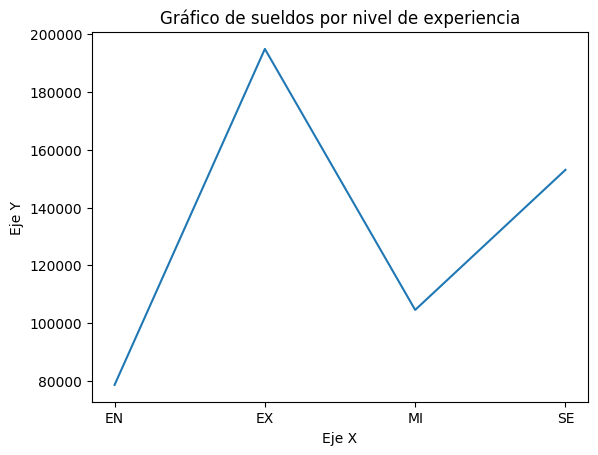

In [82]:
# Visualizaciones exploratorias univariadas: Crea dos tipos diferentes de visualizaciones univariadas. 
# Cada visualización debe incluir una breve interpretación dentro del archivo de código.

grupo = df.groupby(['experience_level'])
resumen = grupo.agg({'salary_in_usd': 'mean'}).reset_index()
x = resumen['experience_level']
y = [1, 2, 3, 4]
target = resumen['salary_in_usd']
# gráfico de líneas para ver los sueldos promedio de acuerdo al nivel de experiencia
plt.plot(x, target)
plt.title("Gráfico de sueldos por nivel de experiencia")
plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.show()


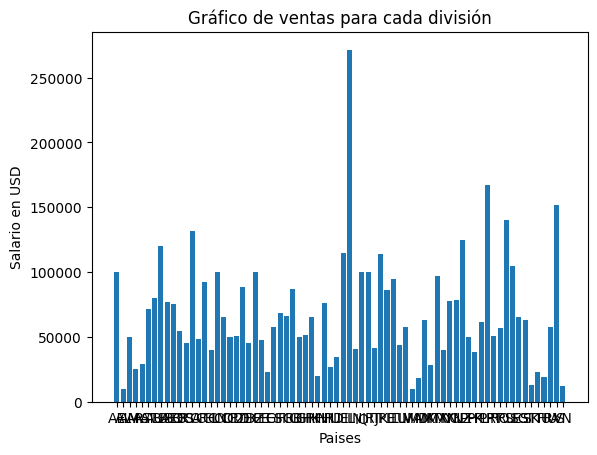

In [112]:
grupo = df.groupby(['company_location'])
resumen = grupo.agg({'salary_in_usd': 'mean'}).reset_index()
x = resumen['company_location']
target = resumen['salary_in_usd']
# Crear el gráfico de barras de salarios promedio por pais
plt.bar(x, target)
plt.title("Gráfico de ventas para cada división")
plt.xlabel("Paises")
plt.ylabel("Salario en USD")
plt.show()

# intente reducir a los 6 paises con mas entradas para visualizar mejor pero no me salió

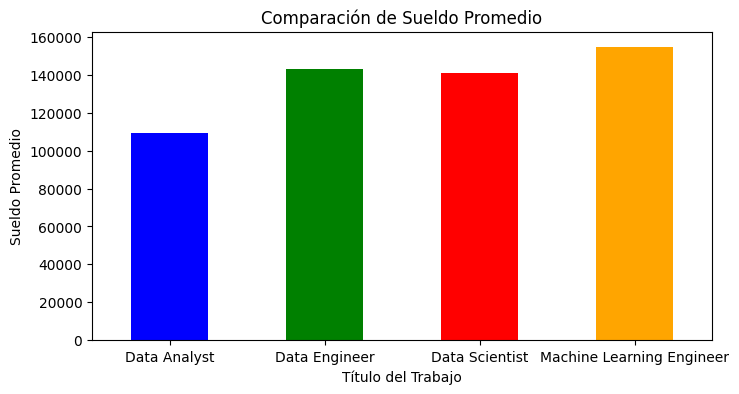

In [113]:
# Visualizaciones exploratorias multivariadas: Crea dos tipos diferentes de visualizaciones multivariadas. 
# Cada visualización debe incluir una breve interpretación dentro del archivo de código.

# filtro las 4 profesiones con mas entradas
df_filtered_jobs = df[df['job_title'].isin(['Data Engineer', 'Data Scientist', 'Data Analyst', 'Machine Learning Engineer'])]
# calcular el sueldo promedio para cada puesto de trabajo
promedio_salario = df_filtered_jobs.groupby('job_title')['salary_in_usd'].mean()
# crear el gráfico de barras
plt.figure(figsize=(8, 4))
promedio_salario.plot(kind='bar', color=['blue', 'green', 'red', 'orange'])
plt.title('Comparación de Sueldo Promedio')
plt.xlabel('Título del Trabajo')
plt.ylabel('Sueldo Promedio')
plt.xticks(rotation=0)

plt.show()

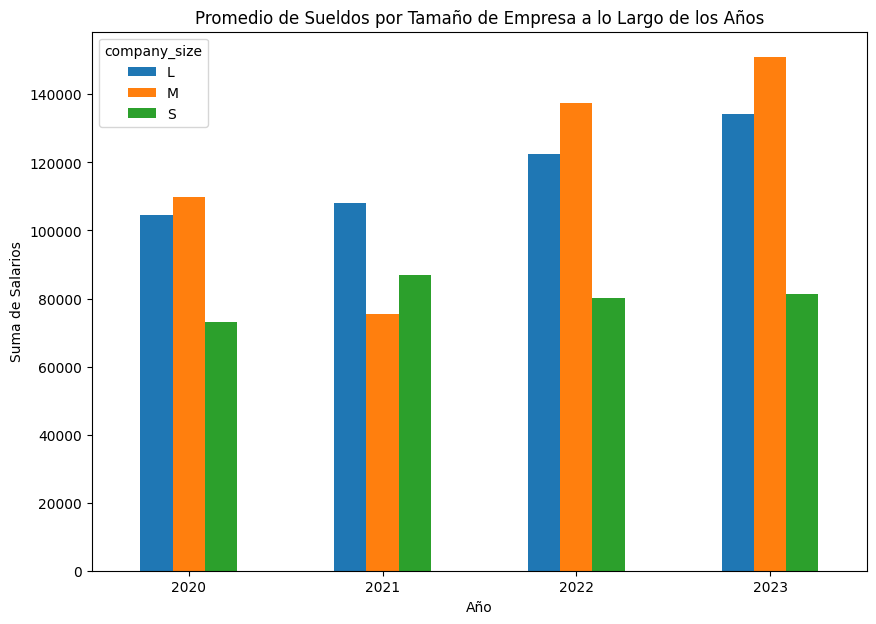

In [114]:
prom_salarios = df.groupby(['work_year', 'company_size'])['salary_in_usd'].mean().unstack()

# Crear el gráfico de barras
prom_salarios.plot(kind='bar', figsize=(10, 7))
plt.title('Promedio de Sueldos por Tamaño de Empresa a lo Largo de los Años')
plt.xlabel('Año')
plt.ylabel('Promedio de Salarios')
plt.xticks(rotation=0)

# Mostrar el gráfico
plt.show()


Nota: Se puede observar un incremento del gasto de las empresas en sueldo a lo largo de los años en cuestion

In [115]:
# Análisis adicional:
# Estadísticas descriptivas: Proporciona un resumen estadístico del dataset, incluyendo medidas de tendencia central y dispersión para las variables numéricas.
# Identificación de tendencias: Analiza y discute cualquier tendencia notable que observes en los datos, apoyándote en las visualizaciones y estadísticas descriptivas.

df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3755.000000,3755.000000,3755.000000
mean,2022.373635,143760.872091,137939.787750,46.271638
std,0.691448,77374.960043,62481.166629,48.589050
min,2020.000000,6000.000000,10000.000000,0.000000
25%,2022.000000,100000.000000,95000.000000,0.000000
50%,2022.000000,136100.000000,135000.000000,0.000000
75%,2023.000000,180000.000000,175000.000000,100.000000
max,2023.000000,1000000.000000,450000.000000,100.000000


Este dataset contiene informacion sobre las profesiones en el area del analisis de datos y lo mejor que se puede rescatar a mi parecer son los salarios, despues realizar las operaciones de promedio y desviacion se llega a la conclusion que los sueldos varian demasiado y no hay suficiente informacion para asumir la causa.
En general si hablamos del promedio podemos afirmar que esta por encima del pormedio general de salarios anuales de los Estado Unidos segun datos de internet.
Las demas categorias numericas realmente no arrojan mucha informacion aprovechable.